In [1]:
import pandas as pd
import seaborn as sns
import requests
from datetime import datetime, timedelta
import time
import numpy as np

In [2]:
df=pd.read_json('gme.json')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5600 non-null   datetime64[ns]
 1   Open       5600 non-null   float64       
 2   High       5600 non-null   float64       
 3   Low        5600 non-null   float64       
 4   Close      5600 non-null   float64       
 5   Adj Close  5600 non-null   float64       
 6   Volume     5600 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 306.4 KB


In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-02-13,2.40625,2.51500,2.38125,2.51250,1.691666,76216000
1,2002-02-14,2.54375,2.54875,2.48125,2.50000,1.683250,11021600
2,2002-02-15,2.50000,2.50625,2.46250,2.48750,1.674834,8389600
3,2002-02-19,2.47500,2.47500,2.34375,2.38750,1.607504,7410400
4,2002-02-20,2.40000,2.46875,2.38125,2.46875,1.662210,6892800


We can see that there are 7 total variables: date, open, high, low, close, adj close, and volume. All of these values are numeric in nature with the date column being in a date time format. 

In [9]:

high=df[df['High']==df['High'].max()]
print(high)

           Date   Open    High      Low      Close  Adj Close     Volume
4772 2021-01-28  66.25  120.75  28.0625  48.400002  48.400002  235263200


In [10]:
df['month']=df['Date'].dt.month

In [11]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,month
0,2002-02-13,2.40625,2.51500,2.38125,2.51250,1.691666,76216000,2
1,2002-02-14,2.54375,2.54875,2.48125,2.50000,1.683250,11021600,2
2,2002-02-15,2.50000,2.50625,2.46250,2.48750,1.674834,8389600,2
3,2002-02-19,2.47500,2.47500,2.34375,2.38750,1.607504,7410400,2
4,2002-02-20,2.40000,2.46875,2.38125,2.46875,1.662210,6892800,2


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5600 non-null   datetime64[ns]
 1   Open       5600 non-null   float64       
 2   High       5600 non-null   float64       
 3   Low        5600 non-null   float64       
 4   Close      5600 non-null   float64       
 5   Adj Close  5600 non-null   float64       
 6   Volume     5600 non-null   int64         
 7   month      5600 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 350.1 KB


In [23]:
monthly_totals = {month: 0 for month in range(1, 13)}
monthly_counts = {month: 0 for month in range(1, 13)}
for i in range(len(df)):
    month = df.loc[i, 'Date'].month
    avg = (df.loc[i, 'High'] + df.loc[i, 'Low']) / 2
    
    monthly_totals[month] += avg
    monthly_counts[month] += 1

monthly_averages = {month: (monthly_totals[month] / monthly_counts[month]) if monthly_counts[month] > 0 else 0 for month in range(1, 13)}

for month in range(1, 13):
    print(f'Month: {month}, Average: {monthly_averages[month]}')

Month: 1, Average: 8.394146076404493
Month: 2, Average: 8.115184758660508
Month: 3, Average: 9.417955668326698
Month: 4, Average: 9.578932123689722
Month: 5, Average: 9.249860214135023
Month: 6, Average: 10.193287575692963
Month: 7, Average: 9.48407867025863
Month: 8, Average: 9.596032276639347
Month: 9, Average: 9.570212510000005
Month: 10, Average: 9.064278152892557
Month: 11, Average: 9.442765287777776
Month: 12, Average: 8.551337557112056


In [30]:
def scatter(df, x, y, outliers):
    idx=[]
    for i in range(outliers):
        idx=df[x].idxmax()
        df.drop([idx], inplace=True)
    sns.scatterplot(data=df, x=x, y=y)

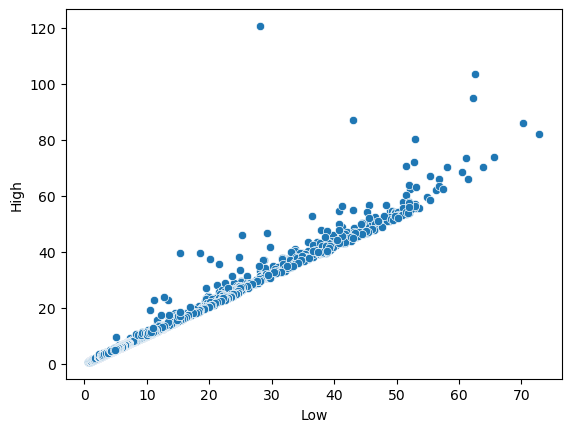

In [31]:
scatter(df, 'Low', 'High', 0)

The data appears to have a fairly strong, positive correlation between the high and low prices. 

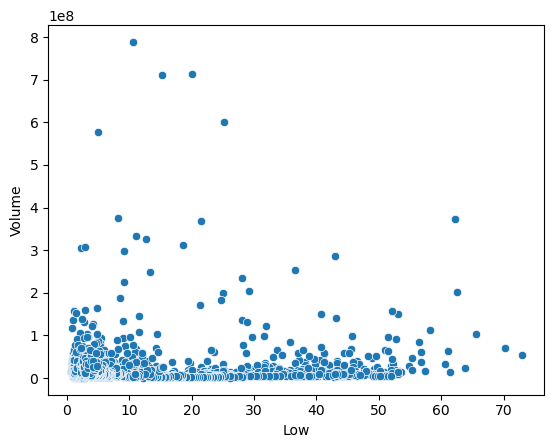

In [32]:
scatter(df, 'Low', 'Volume', 0)

In [33]:
df['Low'].corr(df['Volume'])

0.10259646883179026

The data does not seem to have a relationship. The data is scattered and there is no visible pattern, form, or direction. 

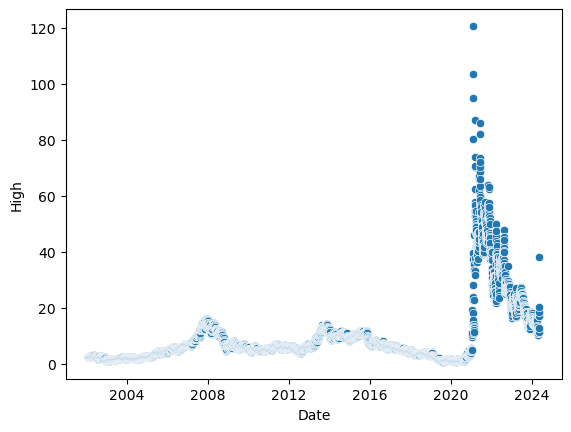

In [34]:
scatter(df, 'Date', 'High', 0)

In [39]:
df['High'].corr(df['Date'].astype(np.int64))

0.4889959232324393

In [40]:
highlog=np.log(df['High'])
df['log high']=highlog
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,log high
0,2002-02-13,2.40625,2.51500,2.38125,2.51250,1.691666,76216000,0.922273
1,2002-02-14,2.54375,2.54875,2.48125,2.50000,1.683250,11021600,0.935603
2,2002-02-15,2.50000,2.50625,2.46250,2.48750,1.674834,8389600,0.918788
3,2002-02-19,2.47500,2.47500,2.34375,2.38750,1.607504,7410400,0.906240
4,2002-02-20,2.40000,2.46875,2.38125,2.46875,1.662210,6892800,0.903712


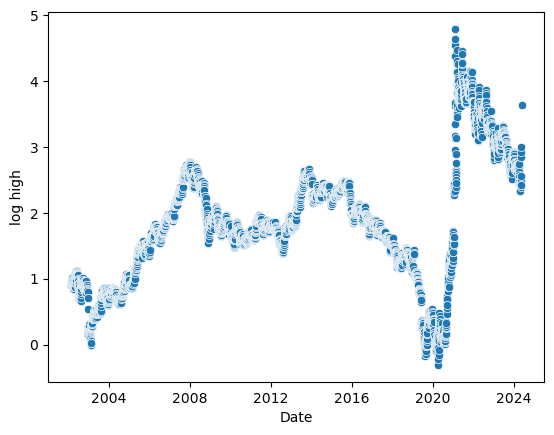

In [41]:
scatter(df, 'Date', 'log high', 0)

In [7]:
latest=df[df['Date']==df['Date'].max()]
print(latest)

           Date   Open       High    Low      Close  Adj Close     Volume
5599 2024-05-13  26.34  38.200001  24.77  30.450001  30.450001  182308700


In [11]:
dfdropped2024=df[df['Date'].dt.year!=2024]


In [ ]:
dfdropped2024['year']=df['Date'].dt.year

In [19]:
dfdropped2024['year'].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype=int64)

In [23]:
years={}
for i in range(len(dfdropped2024)):
    year=dfdropped2024.loc[i]['Date'].year
    if year not in years.keys():
        years[year]=1
    else:
        years[year]+=1
sum(years.values())/len(years)

250.36363636363637

In [ ]:
api=input('apikey?')
url=f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=GME&interval=5min&apikey={api}'
rsp=requests.get(url)
rsp.raise_for_status()
called = rsp.json()
print(called)

In [30]:
called=pd.DataFrame(called['Time Series (5min)'])
called.head()

KeyError: 'Time Series (5min)'

In [35]:
url='https://api.polygon.io/v2/aggs/ticker/GME/range/1/day/2024-05-09/2024-09-27?adjusted=true&sort=asc&apiKey=...'
rsp=requests.get(url)
rsp.raise_for_status()
called = rsp.json()
print(called)

{'ticker': 'GME', 'queryCount': 97, 'resultsCount': 97, 'adjusted': True, 'results': [{'v': 25748379.0, 'vw': 16.8153, 'o': 15.9, 'c': 18.01, 'h': 18.51, 'l': 15.35, 't': 1715227200000, 'n': 149080}, {'v': 36788017.0, 'vw': 18.1941, 'o': 17.93, 'c': 17.46, 'h': 20.2, 'l': 16.88, 't': 1715313600000, 'n': 238340}, {'v': 187230976.0, 'vw': 29.7784, 'o': 26.34, 'c': 30.45, 'h': 38.2, 'l': 24.77, 't': 1715572800000, 'n': 1717610}, {'v': 206973629.0, 'vw': 51.6626, 'o': 64.83, 'c': 48.75, 'h': 64.83, 'l': 36, 't': 1715659200000, 'n': 2971358}, {'v': 131776493.0, 'vw': 38.3398, 'o': 40.31, 'c': 39.55, 'h': 42.35, 'l': 31, 't': 1715745600000, 'n': 1738808}, {'v': 76159605.0, 'vw': 31.1035, 'o': 33.98, 'c': 27.67, 'h': 35.24, 'l': 27.59, 't': 1715832000000, 'n': 837428}, {'v': 96046070.0, 'vw': 21.566, 'o': 21.86, 'c': 22.21, 'h': 22.41, 'l': 19.7, 't': 1715918400000, 'n': 925643}, {'v': 55261216.0, 'vw': 21.1343, 'o': 21.54, 'c': 23.14, 'h': 23.4, 'l': 18.94, 't': 1716177600000, 'n': 504233}, 

In [36]:
called=pd.DataFrame(called['results'])
called.head()

,v,vw,o,c,h,l,t,n
0,25748379.0,16.8153,15.90,18.01,18.51,15.35,1715227200000,149080
1,36788017.0,18.1941,17.93,17.46,20.20,16.88,1715313600000,238340
2,187230976.0,29.7784,26.34,30.45,38.20,24.77,1715572800000,1717610
3,206973629.0,51.6626,64.83,48.75,64.83,36.00,1715659200000,2971358
4,131776493.0,38.3398,40.31,39.55,42.35,31.00,1715745600000,1738808


In [11]:
recent=pd.read_json('recentgme.json')

In [25]:
recent.head()


,Date,Open,High,Low,Close,Volume
0,2024-05-14,64.83,64.83,36.00,48.75,206973629
1,2024-05-15,40.31,42.35,31.00,39.55,131776493
2,2024-05-16,33.98,35.24,27.59,27.67,76159605
3,2024-05-17,21.86,22.41,19.70,22.21,96046070
4,2024-05-20,21.54,23.40,18.94,23.14,55261216


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5600 non-null   datetime64[ns]
 1   Open       5600 non-null   float64       
 2   High       5600 non-null   float64       
 3   Low        5600 non-null   float64       
 4   Close      5600 non-null   float64       
 5   Adj Close  5600 non-null   float64       
 6   Volume     5600 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 306.4 KB


In [19]:
df.drop(columns=['Adj Close'], inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5600 non-null   datetime64[ns]
 1   Open    5600 non-null   float64       
 2   High    5600 non-null   float64       
 3   Low     5600 non-null   float64       
 4   Close   5600 non-null   float64       
 5   Volume  5600 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 262.6 KB


In [22]:
df=pd.concat([df, recent])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5694 entries, 0 to 93
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5694 non-null   datetime64[ns]
 1   Open    5694 non-null   float64       
 2   High    5694 non-null   float64       
 3   Low     5694 non-null   float64       
 4   Close   5694 non-null   float64       
 5   Volume  5694 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 311.4 KB


In [13]:
def gather_data(start, end):
    api=input("api?")
    data={'Date':[], 'Open':[], 'High':[], 'Low':[], 'Close':[], 'Volume':[]}
    current_date = pd.to_datetime(start)
    end_date=pd.to_datetime(end)
    
    while current_date<=end_date:
        date_str = current_date.strftime('%Y-%m-%d')
        url= f'https://api.polygon.io/v1/open-close/AMC/{date_str}?adjusted=false&apiKey={api}'
        
        response=requests.get(url)
        if response.status_code==200:
            json_data=response.json()
            data["Date"].append(current_date)
            data["Open"].append(json_data['open'])
            data["High"].append(json_data['high'])
            data["Low"].append(json_data['low'])
            data["Close"].append(json_data['close'])
            data["Volume"].append(json_data['volume'])
        else:
            print("Bad Request")
            
        current_date+=timedelta(days=1)
        time.sleep(15)
        current_date+=timedelta(days=1)
    return pd.DataFrame(data)

gather_data('2023-01-01', '2024-10-1')

api?2atA47KMpygWRov7z_zLABcIgdKIrqTI
Bad Request
Bad Request


KeyboardInterrupt: 

In [12]:
url='https://api.polygon.io/v2/aggs/ticker/AAPL/range/1/day/2020-01-09/2024-10-01?adjusted=false&sort=asc&apiKey=2atA47KMpygWRov7z_zLABcIgdKIrqTI'
rsp=requests.get(url)
called = rsp.json()
amc=called
print(called)
data={'Date':[], 'Open':[], 'High':[], 'Low':[], 'Close':[], 'Volume':[]}
json_data=rsp.json()

data["Open"].append(json_data['o'])
data["High"].append(json_data['h'])
data["Low"].append(json_data['l'])
data["Close"].append(json_data['c'])
data["Volume"].append(json_data['v'])
amc=pd.DataFrame(data)

{'ticker': 'AAPL', 'queryCount': 501, 'resultsCount': 501, 'adjusted': False, 'results': [{'v': 114311663.0, 'vw': 141.2135, 'o': 138.21, 'c': 142.45, 'h': 143.07, 'l': 137.685, 't': 1664769600000, 'n': 838786}, {'v': 87780064.0, 'vw': 145.4907, 'o': 145.03, 'c': 146.1, 'h': 146.22, 'l': 144.26, 't': 1664856000000, 'n': 687504}, {'v': 79269968.0, 'vw': 145.2495, 'o': 144.075, 'c': 146.4, 'h': 147.38, 'l': 143.01, 't': 1664942400000, 'n': 605861}, {'v': 68308669.0, 'vw': 146.0741, 'o': 145.81, 'c': 145.43, 'h': 147.54, 'l': 145.22, 't': 1665028800000, 'n': 538671}, {'v': 85925559.0, 'vw': 140.7932, 'o': 142.54, 'c': 140.09, 'h': 143.1, 'l': 139.445, 't': 1665115200000, 'n': 666459}, {'v': 74899002.0, 'vw': 140.1978, 'o': 140.42, 'c': 140.42, 'h': 141.89, 'l': 138.5729, 't': 1665374400000, 'n': 620863}, {'v': 77001872.0, 'vw': 139.5393, 'o': 139.9, 'c': 138.98, 'h': 141.35, 'l': 138.22, 't': 1665460800000, 'n': 608882}, {'v': 69933744.0, 'vw': 139.0968, 'o': 139.13, 'c': 138.34, 'h': 140

KeyError: 'o'

In [10]:
amc.head()

AttributeError: 'dict' object has no attribute 'head'

In [15]:
amc=pd.read_csv('amc.csv')

In [16]:
amc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-18,19.180000,19.790001,18.900000,18.900000,13.593410,5457200
1,2013-12-19,18.900000,19.490000,18.809999,19.490000,14.017754,1605400
2,2013-12-20,19.650000,19.770000,19.400000,19.680000,14.154409,737100
3,2013-12-23,19.790001,19.990000,19.500000,19.740000,14.197562,698100
4,2013-12-24,19.740000,19.820000,19.500000,19.530001,14.046528,213700


In [21]:
df['Date'] = pd.to_datetime(df['Date'])
amc['Date'] = pd.to_datetime(amc['Date'])

<AxesSubplot:xlabel='Date', ylabel='High'>

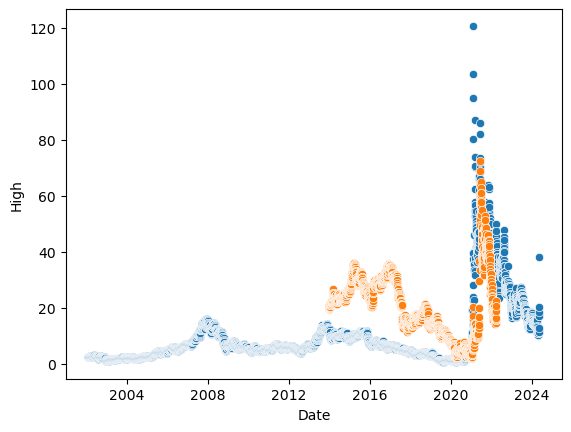

In [23]:

sns.scatterplot(data=df, x='Date', y='High')
sns.scatterplot(data=amc, x='Date', y='High')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5600 non-null   datetime64[ns]
 1   Open       5600 non-null   float64       
 2   High       5600 non-null   float64       
 3   Low        5600 non-null   float64       
 4   Close      5600 non-null   float64       
 5   Adj Close  5600 non-null   float64       
 6   Volume     5600 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 306.4 KB
